In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/kaggle/input/face-expression-recognition-dataset/images/train'
validation_dir = '/kaggle/input/face-expression-recognition-dataset/images/validation'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


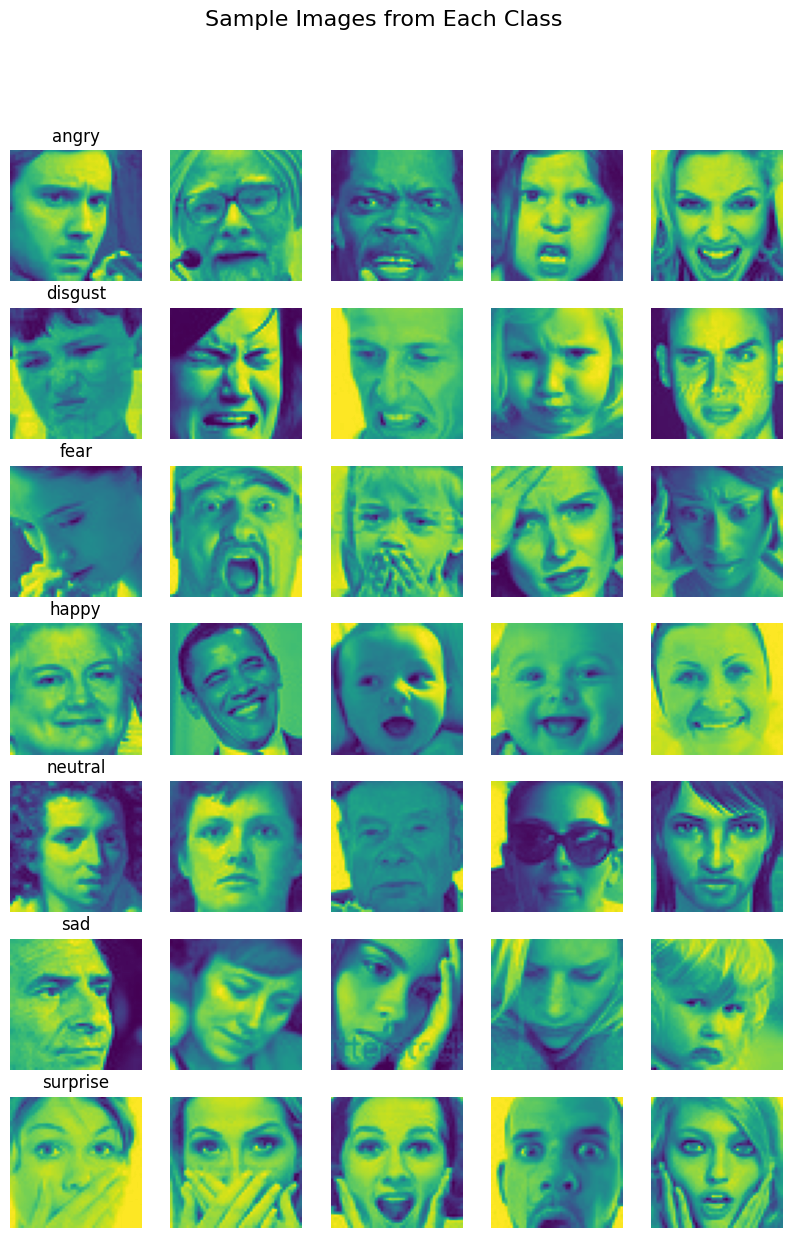

In [27]:
def plot_images(generator, class_labels, num_images=5):
    """
    Plot sample images from each class.
    
    Args:
    generator: ImageDataGenerator - Data generator to fetch images from.
    class_labels: list - List of class labels.
    num_images: int - Number of images to display per class.
    """
    fig, axes = plt.subplots(len(class_labels), num_images, figsize=(num_images * 2, len(class_labels) * 2))
    fig.suptitle('Sample Images from Each Class', fontsize=16)

    for i, class_label in enumerate(class_labels):
        # Get the index of the current class
        class_idx = generator.class_indices[class_label]
        
        # Get images of the current class
        class_images = [img for img, label in zip(generator.filepaths, generator.classes) if label == class_idx]
        
        for j in range(num_images):
            img_path = class_images[j]
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_label)
    
    plt.show()

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Plot sample images from the training set
plot_images(train_generator, class_labels)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    validation_data=validation_generator
)



Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


900/900 ━━━━━━━━━━━━━━━━━━━━ 76s 79ms/step - accuracy: 0.2369 - loss: 1.8426 - val_accuracy: 0.2585 - val_loss: 1.8030
Epoch 2/50
  1/900 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0625 - loss: 1.9372

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.0625 - loss: 1.9372 - val_accuracy: 0.1923 - val_loss: 1.8015
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.2431 - loss: 1.8112 - val_accuracy: 0.2551 - val_loss: 1.7759
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.3438 - loss: 1.8957 - val_accuracy: 0.2308 - val_loss: 1.8483
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 71s 78ms/step - accuracy: 0.2465 - loss: 1.7979 - val_accuracy: 0.2663 - val_loss: 1.7566
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.2812 - loss: 1.7101 - val_accuracy: 0.3462 - val_loss: 1.5881
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.2590 - loss: 1.7809 - val_accuracy: 0.2858 - val_loss: 1.7390
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.3125 - loss: 1.7796 - val_accuracy: 0.0769 - val_loss: 1.8996
Epoch 9/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 72s 79ms/step - accuracy: 0.2696 - loss: 1.7674 - val_accuracy: 

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5714 - loss: 1.1381
Validation Accuracy: 56.62%


221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step
              precision    recall  f1-score   support

       angry       0.13      0.15      0.14       960
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.05      0.07      1018
       happy       0.25      0.27      0.26      1825
     neutral       0.17      0.25      0.20      1216
         sad       0.16      0.13      0.14      1139
    surprise       0.11      0.13      0.11       797

    accuracy                           0.17      7066
   macro avg       0.13      0.14      0.13      7066
weighted avg       0.17      0.17      0.17      7066



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


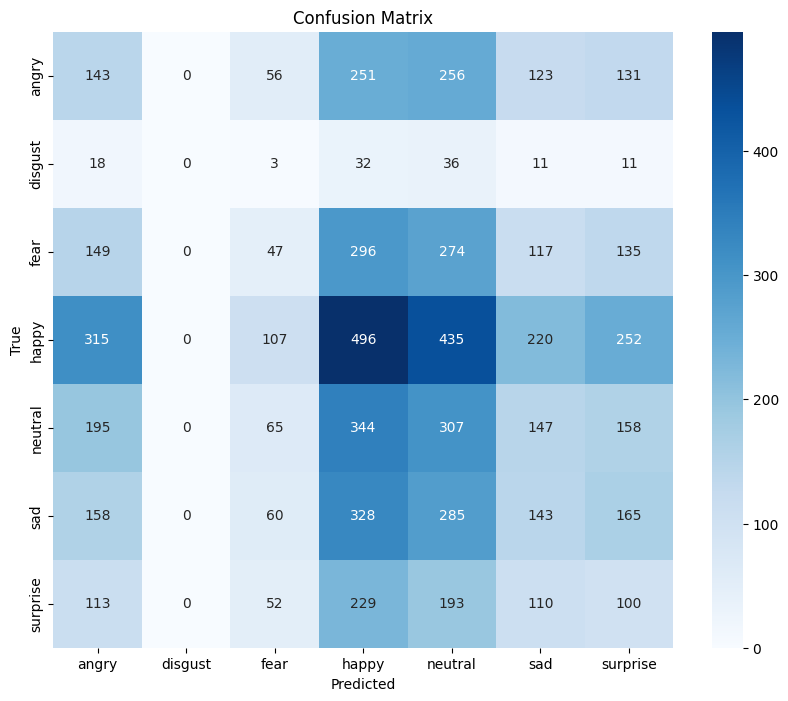

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the ground truth labels and the predicted labels
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Plot confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Testing

In [24]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define validation directory and classes
validation_dir = '/kaggle/input/face-expression-recognition-dataset/images/validation'
class_labels = list(validation_generator.class_indices.keys())

# Choose a random class and a random image within that class
random_class = random.choice(class_labels)
class_dir = os.path.join(validation_dir, random_class)
random_image = random.choice(os.listdir(class_dir))

# Load and preprocess the image
img_path = os.path.join(class_dir, random_image)
img = load_img(img_path, target_size=(48, 48))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [25]:
# Predict the class of the image
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class = class_labels[predicted_class_index]

# Get the actual class label
actual_class = random_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Actual Class: neutral
Predicted Class: neutral


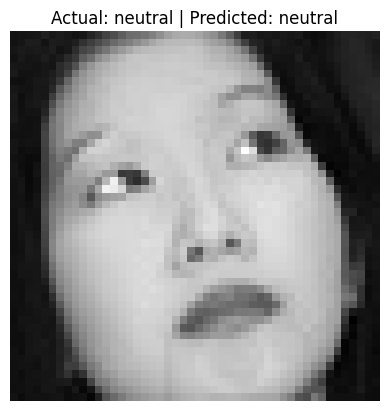

In [26]:
import matplotlib.pyplot as plt

# Print the actual and predicted values
print(f'Actual Class: {actual_class}')
print(f'Predicted Class: {predicted_class}')

# Display the image
plt.imshow(img)
plt.title(f'Actual: {actual_class} | Predicted: {predicted_class}')
plt.axis('off')
plt.show()
